In [ ]:
NOtebook to get and clean the data of EL MUNDO Newspaper about covid19 vaccination

In [1]:
from helpers import *

In [2]:
# Clean function in order to eliminate characters like \n or \n\n after scraping
def preprocessor(text):
#     text = str(text).lower()
    
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n\n', '', text)
    text = re.sub('\'','', text)
    text = re.sub('\n', '', text)
    text = re.sub('\xa0', '', text)
    text = re.sub('\ufeff', '', text)
    text = re.sub('\u2009', '', text)
    text = re.sub('\u200b', '', text)
#     text = re.sub('\w*\d\w*', '', text)
    return text
    

In [125]:
#Install Driver
# Versión Chrome 89.0.4389.114 (Build oficial) (64 bits)
driver = webdriver.Chrome(ChromeDriverManager().install())




====== WebDriver manager ======
Current google-chrome version is 94.0.4606
Get LATEST driver version for 94.0.4606
Driver [/home/david/.wdm/drivers/chromedriver/linux64/94.0.4606.113/chromedriver] found in cache


## EL MUNDO

In [126]:
search_url='https://www.elmundo.es/'
driver.get(search_url)
driver.maximize_window() 
time.sleep(1)
# Aceptar cookkies
driver.find_element_by_xpath('/html/body/div[1]/div/div/div/div/div[2]/button[2]').click()

In [127]:
driver.find_element_by_xpath('/html/body/header/div/div/div[2]/div[2]/a/span').click()

In [128]:
driver.find_element_by_id("inputEmailLogin").send_keys(email)

In [101]:
# Mirar porque no puedo pulsar el boton siguiente
# DOY AL BOTON SIGUIENTE
# driver.find_element_by_xpath('/html/body/ue-auth-app//div/div/div/iron-pages/div[2]/ue-auth-login//div/form/iron-pages/div[1]/div[1]/div/div/div[2]/button/div[2]').click()

In [129]:
driver.find_element_by_id("inputPasswordLogin").send_keys(password)

In [52]:
# DOY AL BOTON INICIAR SESION
# driver.find_element_by_xpath('/html/body/ue-auth-app//div/div/div/iron-pages/div[2]/ue-auth-login//div/form/iron-pages/div[2]/div/div[3]/div/button/div[2]').click()

In [75]:
# #Lupa
# driver.find_element_by_xpath('/html/body/header/div/div/div[2]/div[3]/a').click()
# #words to make the search
# time.sleep(1)
# key_words = 'vacunacion covid-19'
# time.sleep(1)
# driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/div/div/div[1]/ul/li[1]/div[1]/form/label[1]/input').send_keys(key_words)
# driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/div/div/div[1]/ul/li[1]/div[1]/form/label[2]/input').click()

In [76]:
# # 
# list_links=[]
# while True: 
#     links = driver.find_elements_by_xpath('//h3/a')
#     for i in links: 
#         list_links.append(i.get_attribute('href'))
#     try :
#         next = driver.find_element_by_xpath("//a[contains(text(), 'Siguiente')]")
#         next.click()
#         time.sleep(0.5)
#     except :
#         print("No more pages left")
#         break




No more pages left


In [78]:
with open("list_links_el_mundo.txt", 'w') as f:
    for s in list_links:
        f.write(str(s) + '\n')

In [111]:
# Store the list in a document
with open("list_links_el_mundo.txt", 'r') as f:
    list_links_el_mundo = [line.rstrip('\n') for line in f]
    list_links_el_mundo= list(set(list_links_el_mundo))
len(list_links_el_mundo)

2978

In [112]:
def get_html_el_mundo(list_links):
    #Count
    extracted_articles=0 
    for i in list_links: 
        driver.get(i)
        html = driver.page_source
        tail=i.split('/')[-1]
        extracted_articles += 1
        with open(f'/home/david/Escritorio/VACTINATION_PROJECT/HTMLs/EL_MUNDO/{tail}.txt', 'w') as f: 
            f.write(html)
        print(f'Extracted articles: {extracted_articles} of {len(list_links)}',end='\r')
        time.sleep(1)

In [1]:
#DOwnloaded 1082/2978 articles --> continue in the next cell
# get_html_el_mundo(list_links_el_mundo)

In [ ]:
#DOWNLOAD THE REST OF ARTICLES OF THE LIST

In [2]:
# get_html_el_mundo(list_links_el_mundo[1083:])

In [3]:
# get_html_el_mundo(list_links_el_mundo[1275:])

In [4]:
# get_html_el_mundo(list_links_el_mundo[1983:])

In [130]:
get_html_el_mundo(list_links_el_mundo[2028:])

In [3]:
import os
list_articles_mundo=[]
for filename in os.listdir("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/EL_MUNDO/"):
    with open(os.path.join("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/EL_MUNDO/", filename), 'r') as f:
        html_file = f.read()
    list_text=[]
    soup = BeautifulSoup(html_file, 'html.parser')
    try:
        title=soup.find("h1").text.strip()
    except: 
        title="error"
    try:
        author=soup.find(class_='ue-c-article__byline-name').text.strip()
    except: 
        author = "error"
    try:
        link=soup.find('link', rel='canonical')['href']
    except: 
        link="error"
    try:
        subheadline= soup.find(class_="ue-c-article__standfirst").text.strip()
    except: 
        subheadline="error"
    try:
        date= soup.time.attrs['datetime']
    except: 
        date="error"
#     try: 
#         #eliminate cards with tweets or wahtever, we select just the text of the article
#         div_tweets=soup.find_all("div",class_='ue-c-article__card ue-c-article__card--light')
#         for tweet in div_tweets: 
#             tweet.decompose()
#     except:
#         continue
    try:
        tweets = soup.find_all(attrs={"dir" : "ltr"})
        for tweet in tweets:
            tweet.decompose()
    except: 
        pass
    try:
        #Eliminate sentence at the end:  Conforme a los criterios deThe Trust Project
        div_trust_description=soup.find("div",class_='ue-c-article__trust-description').decompose()
        tf=soup.find(class_="ue-l-article__body ue-c-article__body").find_all("p")
        for p in tf:
            list_text.append(p.get_text().strip())
        text=' '.join(list_text).strip()
        if soup.find(class_="ue-c-article__interview"): 
            list_text.append(soup.find(class_="ue-c-article__interview").text)
            text=' '.join(list_text).strip()
    except: 
        text= "error"
    list_articles_mundo.append({'Title': title, 
                          'Subheadline':subheadline,
                          'Text':text,
                          'Authors': author, 
                          'Date': date,
                          'Link':link}) 



In [40]:
with open("list_links_el_mundo.txt", 'w') as f:
    for s in list_articles_mundo:
        f.write(str(s) + '\n')

In [41]:
# Store the list in a document
with open("list_articles_mundo.txt", 'r') as f:
    list_links_el_mundo_prueba = [line.rstrip('') for line in f]
    


In [32]:
articles_ElMundo = pd.DataFrame.from_dict(list_articles_mundo)
articles_ElMundo 

,Title,Subheadline,Text,Authors,Date,Link
0,"Madrid, pendiente de si Ayuso y Sánchez llegan...",Sánchez ha convocado para hoy un Consejo de Mi...,Pedro Sánchez no va a aceptar el varapalo judi...,ESTHER MUCIENTES,2020-10-09T09:12:32Z,https://www.elmundo.es/espana/2020/10/09/5f7f9...
1,La letra pequeña del paquete de medidas de Sán...,Dentro de los 200.000 millones de euros que pr...,"Las nuevas medidas del Gobierno, anunciadas po...",EDUARDO FERNÁNDEZ,2020-03-18T07:55:43Z,https://www.elmundo.es/economia/2020/03/18/5e7...
2,Enlaces trampa y un piso junto a la plaza Roja...,Los ciberataques contra científicos británicos...,"EEUU, Reino Unido y Canadá han denunciado cibe...",XAVIER COLÁS,2020-07-17T12:58:47Z,https://www.elmundo.es/internacional/2020/07/1...
3,Científicos australianos descubren la defensa ...,Un equipo de investigadores de Melbourne afirm...,Un grupo de científicos australianos ha descub...,EFE,2020-03-17T12:02:56Z,https://www.elmundo.es/ciencia-y-salud/salud/2...
4,"Andalucía | Coronavirus, últimas noticias: La ...",Andalucía suma este martes 635 nuevos casos de...,Andalucía suma este martes 635 nuevos casos de...,EL MUNDO,2021-03-23T13:54:19Z,https://www.elmundo.es/andalucia/2021/03/23/60...
...,...,...,...,...,...,...
2971,"Carolina Darias asegura que ""todo apunta"" a qu...",La ministra de Sanidad confirma que la vacunac...,"La ministra de Sanidad, Carolina Darias, ha as...",EUROPA PRESS,2021-07-23T08:42:41Z,https://www.elmundo.es/ciencia-y-salud/salud/2...
2972,"Coronavirus España hoy, noticias de última hor...",La EMA estudia cuatro casos de trombosis vincu...,Las comunidades autónomas han notificado este ...,ISABEL VELLOSO | CRISTÓBAL TOLEDO | JAVIER MUNERA,2021-04-10T00:53:09Z,https://www.elmundo.es/ciencia-y-salud/salud/2...
2973,Educación insiste: ni votaciones ni cambios pa...,Sindicatos como ANPE han elevado la propuesta ...,La Conselleria de Educación mantendrá este año...,DANIEL MOLTÓ,2020-10-13T05:15:05Z,https://www.elmundo.es/comunidad-valenciana/al...
2974,Australia volverá a abrir en noviembre sus fro...,Está previsto que en ese momento las regiones ...,Australia anunció este viernes que planea reab...,EFE,2021-10-01T10:08:52Z,https://www.elmundo.es/internacional/2021/10/0...


### CLEAN DATAFRAME

In [5]:
articles_ElMundo['Newspaper']= 'EL MUNDO'
articles_ElMundo['Country']= 'Spain'
# clean text
articles_ElMundo['Text']=articles_ElMundo['Text'].apply(preprocessor)
articles_ElMundo['Title']=articles_ElMundo['Title'].apply(preprocessor)

In [6]:
articles_ElMundo['n_words'] = articles_ElMundo.Text.apply(lambda x: len(str(x).split(' ')))

In [7]:
articles_ElMundo.sort_values(['n_words'])

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
422,Salvador Illa detalla el plan de vacunación de...,error,,error,2020-11-27T07:32:39Z,https://www.elmundo.es/espana/2020/11/27/5fc0a...,EL MUNDO,Spain,1
2521,"Comparecencia de Joe Biden, en directo",error,"El Presidente de los Estados Unidos, Joe Biden...",error,2021-08-23T16:04:28Z,https://www.elmundo.es/internacional/2021/08/2...,EL MUNDO,Spain,24
72,La Agencia Europea del Medicamento emite su va...,error,La Agencia Europea de Medicamentos (EMA) prese...,error,2021-04-20T15:03:56Z,https://www.elmundo.es/ciencia-y-salud/salud/2...,EL MUNDO,Spain,28
621,Nuevas medidas Covid en España: horario de bar...,Detallamos las nuevas medidas frente al corona...,Las comunidades autónomas han establecido dist...,EL MUNDO | AGENCIAS,2021-06-08T11:49:00Z,https://www.elmundo.es/espana/2021/06/04/60ba1...,EL MUNDO,Spain,61
2384,Alemania declara a España zona de alto riesgo ...,Los viajeros procedentes de España deberán gua...,"El Instituto Robert Koch alemán ha declarado, ...",EL MUNDO,2021-07-23T14:27:53Z,https://www.elmundo.es/economia/2021/07/23/60f...,EL MUNDO,Spain,62
...,...,...,...,...,...,...,...,...,...
1453,"Coronavirus España hoy, última hora | Fernando...","El director del CCAES considera ""posible"" la e...",La obligatoriedad de usar mascarilla al aire l...,ISABEL VELLOSO | SANTIAGO SAIZ,2021-06-01T04:57:44Z,https://www.elmundo.es/ciencia-y-salud/salud/2...,EL MUNDO,Spain,15003
511,"Coronavirus España hoy, última hora | Un brote...",Reino Unido mantiene a España fuera de su list...,La perspectiva de la recuperación turística ha...,ISABEL VELLOSO | SANTIAGO SAIZ,2021-06-04T04:57:31Z,https://www.elmundo.es/ciencia-y-salud/salud/2...,EL MUNDO,Spain,15212
500,Covid-19 | OMS: el origen del virus se investi...,El Consejo de Transparencia y Buen Gobierno (C...,El Consejo de Transparencia ha dado un plazo d...,ESTHER MUCIENTES,2020-12-02T09:20:23Z,https://www.elmundo.es/ciencia-y-salud/salud/2...,EL MUNDO,Spain,15367
411,"Coronavirus España hoy, noticias de última hor...",La incidencia acumulada del coronavirus llega ...,"La estrategia de vacunación contra la Covid, a...",ISABEL VELLOSO | CRISTÓBAL TOLEDO | SANTIAGO S...,2021-04-20T05:05:54Z,https://www.elmundo.es/ciencia-y-salud/salud/2...,EL MUNDO,Spain,15475


In [8]:
# Less than 50 words are videos
articles_ElMundo=articles_ElMundo[articles_ElMundo['n_words']>50]
articles_ElMundo=articles_ElMundo.drop_duplicates()
#all articles that contains vacu
articles_ElMundo=articles_ElMundo[articles_ElMundo.Text.str.contains("vacun|Vacu")|articles_ElMundo.Title.str.contains("vacun|Vacu")|articles_ElMundo.Subheadline.str.contains("vacun|Vacu")]

In [9]:
import datetime
from datetime import datetime

# DATE
for index,row in articles_ElMundo.iterrows(): 
    try:
        articles_ElMundo['Date'][index] =datetime.strptime(articles_ElMundo['Date'][index], '%Y-%m-%dT%H:%M:%SZ').date()
    except: 
        continue

/tmp/ipykernel_188123/2573095751.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_ElMundo['Date'][index] =datetime.strptime(articles_ElMundo['Date'][index], '%Y-%m-%dT%H:%M:%SZ').date()


In [10]:
articles_ElMundo.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_el_mundo_16_11_2021.csv', index = False)

In [11]:
df=pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_el_mundo_16_11_2021.csv')

In [12]:
df.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
74,"Los expertos de la OMS: ""El brote aún puede ir...",error,Más de 300 investigadores y especialistas en s...,SONIA MORENO,2020-02-12,https://www.elmundo.es/ciencia-y-salud/salud/2...,EL MUNDO,Spain,454
815,"Coronavirus, la historia de la vacuna que lleg...",Cuando se han superado el millar de víctimas m...,"A pocos días de estrenar 2020, en China, comen...",LAURA TARDÓN,2020-02-12,https://www.elmundo.es/papel/historias/2020/02...,EL MUNDO,Spain,1583
1668,"Paperas, sarampión y rubéola: la extraña resur...",Mientras todo el mundo se preocupa por el coro...,"No estaban muertos, estaban de parranda. Me re...",BOTICARIA GARCÍA,2020-02-22,https://www.elmundo.es/papel/boticaria-garcia/...,EL MUNDO,Spain,881
2006,Cara y cruz del coronavirus: los mayores damni...,"El coronavirus conlleva, además de las consecu...",Más de 2.500 fallecidos en China y más de 77.0...,MARÍA HERNÁNDEZ,2020-02-24,https://www.elmundo.es/economia/empresas/2020/...,EL MUNDO,Spain,997
2453,Coronavirus: matemática del contagio para mant...,"Cada enfermedad tiene su propio número R0, que...",La matemática del contagio es simple. Tan simp...,PAOLO GIORDANO / CORRIERE DELLA SERA | EL MUNDO,2020-02-26,https://www.elmundo.es/ciencia-y-salud/salud/2...,EL MUNDO,Spain,2097
...,...,...,...,...,...,...,...,...,...
762,Singapur dejará de cubrir los gastos sanitario...,"El ministerio de Sanidad asegura que ""suponen ...",Las autoridades de Singapur han anunciado que ...,EFE,2021-11-09,https://www.elmundo.es/ciencia-y-salud/salud/2...,EL MUNDO,Spain,344
582,"La OMS avisa que Europa afronta un ""invierno d...","La región europea, que incluye a 53 países de ...","El director regional de la OMS para Europa, Ha...",EFE,2021-11-10,https://www.elmundo.es/ciencia-y-salud/salud/2...,EL MUNDO,Spain,405
189,Un ensayo clínico en el que participa el 12 de...,Este estudio publicado en el 'The New England ...,La Unidad Pediátrica de Investigación y Ensayo...,EL MUNDO,2021-11-10,https://www.elmundo.es/ciencia-y-salud/salud/2...,EL MUNDO,Spain,328
1842,Uno de cada dos castellonenses ya está en ries...,22 municipios ya superan los 250 casos de inci...,La pandemia de coronavirus avanza de nuevo sin...,NACHO SANAHUJA,2021-11-10,https://www.elmundo.es/comunidad-valenciana/ca...,EL MUNDO,Spain,1135


In [30]:
df.Link[1430]

'https://www.elmundo.es/pais-vasco/2021/07/01/60de22dde4d4d8e87b8b458c.html'

## NER

In [3]:
df_ner= ner(df.Text,"es_core_news_sm")

In [4]:
df_ner=df_ner.groupby(['Entity','Label']).size().reset_index(name='Frequency')

In [5]:
#Eliminate wrong entitites
list_wrong_entities=['Además', 'Según','según','Así','También','había','Lea','habían','Sólo','aún']
df_ner=df_ner[~df_ner.Entity.isin(list_wrong_entities)]

Text(0.5, 1.0, 'Most frequent NE PERSON')

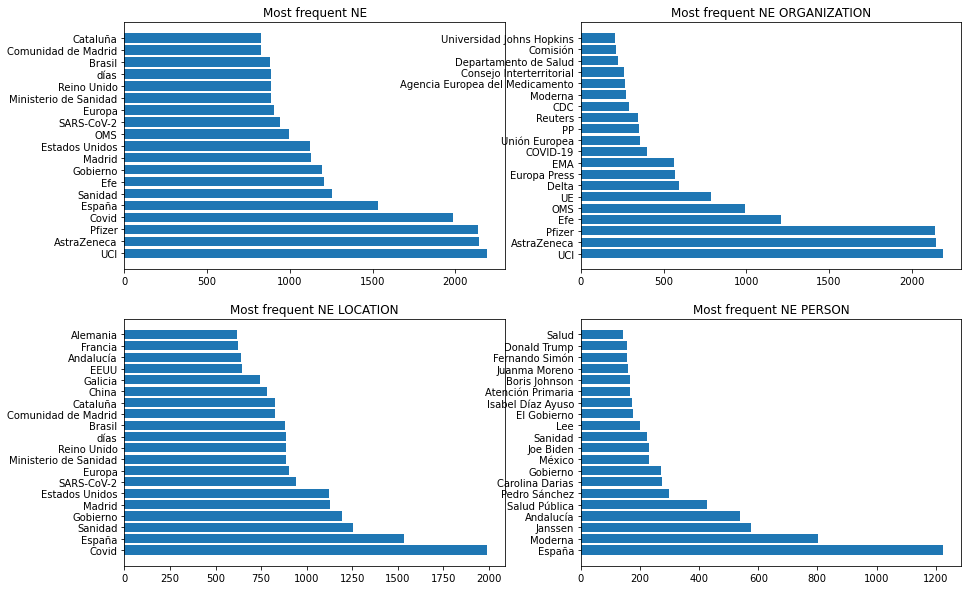

In [7]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].barh(y=df_ner.sort_values('Frequency',ascending=False).head(20)['Entity'],width=df_ner.sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,0].set_title('Most frequent NE')
axs[0, 1].barh(y=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,1].set_title('Most frequent NE ORGANIZATION')
axs[1, 0].barh(y=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,0].set_title('Most frequent NE LOCATION')
axs[1, 1].barh(y=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,1].set_title('Most frequent NE PERSON')